In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.listdir('/content/gdrive/MyDrive/capstone')

['cataract', 'normal eyes']

In [ ]:
print('total cataract images :', len(os.listdir('/content/gdrive/MyDrive/capstone/cataract')))
print('total normal images :', len(os.listdir('/content/gdrive/MyDrive/capstone/normal eyes')))

total cataract images : 32
total normal images : 108


In [ ]:
base_dir = '/content/gdrive/MyDrive/capstone'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split
test_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary',
    subset='validation')

Found 127 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=5,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=2)

Epoch 1/50
5/5 - 6s - loss: 1.1875 - accuracy: 0.6316 - val_loss: 0.7421 - val_accuracy: 0.2500 - 6s/epoch - 1s/step
Epoch 2/50
5/5 - 2s - loss: 0.7531 - accuracy: 0.4000 - val_loss: 0.6623 - val_accuracy: 0.7500 - 2s/epoch - 358ms/step
Epoch 3/50
5/5 - 3s - loss: 0.6387 - accuracy: 0.7000 - val_loss: 0.6325 - val_accuracy: 0.7500 - 3s/epoch - 690ms/step
Epoch 4/50
5/5 - 3s - loss: 0.5826 - accuracy: 0.7500 - val_loss: 0.5674 - val_accuracy: 1.0000 - 3s/epoch - 696ms/step
Epoch 5/50
5/5 - 2s - loss: 0.4820 - accuracy: 0.8000 - val_loss: 0.5466 - val_accuracy: 0.7500 - 2s/epoch - 408ms/step
Epoch 6/50
5/5 - 2s - loss: 0.4761 - accuracy: 0.8000 - val_loss: 0.5601 - val_accuracy: 1.0000 - 2s/epoch - 429ms/step
Epoch 7/50
5/5 - 2s - loss: 0.5308 - accuracy: 0.8000 - val_loss: 0.5780 - val_accuracy: 0.7500 - 2s/epoch - 485ms/step
Epoch 8/50
5/5 - 2s - loss: 0.4961 - accuracy: 0.8421 - val_loss: 0.7807 - val_accuracy: 0.5000 - 2s/epoch - 338ms/step
Epoch 9/50
5/5 - 2s - loss: 0.6333 - accura

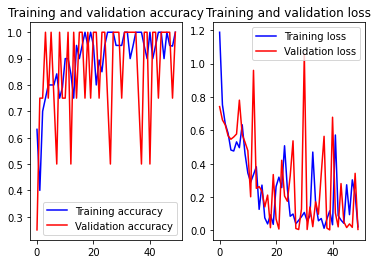

In [ ]:
import matplotlib.pyplot as plt
accur = history.history['accuracy']
val_accur = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accur))

plt.figure()
plt.subplot(121)
plt.plot(epochs, accur, 'b', label='Training accuracy')
plt.plot(epochs, val_accur, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving IMG20211209190342.jpg to IMG20211209190342.jpg


IndexError: ignored

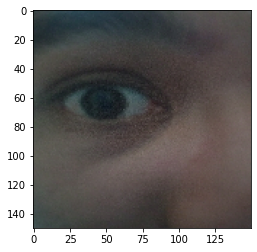

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(base_dir, batch_size=4)
  
  print(fn)
  if classes==0:
    print('normal')
  else:
    print('cataract')